In [52]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

In [53]:
data = pandas.read_csv('metrics_compare.csv')

In [54]:
data.groupby('attack_type').mean()

#Normalize the data (audio_distance and similarity)
data['audio_distance'] = data['audio_distance'] / data['audio_distance'].max()
data['similarity'] = data['similarity'] / data['similarity'].max()
data['dissimilarity'] = 1 - data['similarity']
data['audio_likeness'] = 1 - data['audio_distance']

In [55]:
data.melt(id_vars=['attack_type'], value_vars=['audio_likeness', 'dissimilarity'])

,attack_type,variable,value
0,random_noise,audio_likeness,0.120191
1,fft_noise,audio_likeness,0.827316
2,mel_noise,audio_likeness,0.691423
3,low_and_high_pass,audio_likeness,0.045936
4,fir_filter,audio_likeness,0.427243
...,...,...,...
91,fft_noise,dissimilarity,0.360000
92,mel_noise,dissimilarity,0.360000
93,low_and_high_pass,dissimilarity,0.330579
94,fir_filter,dissimilarity,0.360000


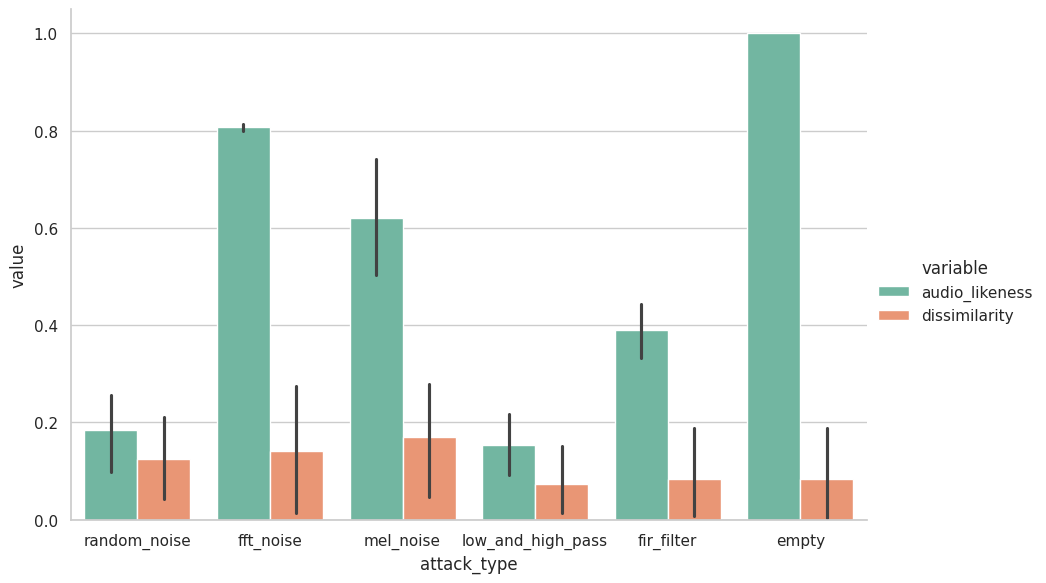

In [56]:
seaborn.set(style='whitegrid')
seaborn.set_palette('Set2')
seaborn.catplot(x='attack_type', y='value', hue='variable', data=data.melt(id_vars=['attack_type'], value_vars=['audio_likeness', 'dissimilarity']), kind='bar', height=6, aspect=1.5)